In [1]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [ ]:
pop_size = 100
n_max_iters = 50

archive_size = 100
num_archive_injections = 10
archive_injections_prob = 1

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

# scores functions weights
pf1=0.5 # default is 0.5
pf2=0.5 # default is 0.5
pf3=0.3 # default is 0.3

u=0.2 # probability to update an individual components (i.e. change its decision variables) (default is 0.2)
l=0.9 # probability to choose long jump towards the best puma rather than short towards other pumas (default is 0.9)
alpha=2# scaling factor for the running strategy (the smaller it is, the farther the jumps are) (default is 2)

algorithm = PumaOptimizer(
    repair=TaskOffloadingRepair(),
    pf1=pf1,
    pf2=pf2,
    pf3=pf3,
    u=u,
    l=l,
    alpha=alpha,
    use_soft_repair=True,
    pop_size=pop_size,
    sampling=TaskOffloadingSampling(),
    n_max_iters=n_max_iters,
    archive_size=archive_size,
    save_history=True,
    num_archive_injections=num_archive_injections,
    archive_injections_prob=archive_injections_prob
)

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [3]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      2 |             - |             -
     2 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      8 |  0.8387978317 |         ideal
     3 |      104 |  0.000000E+00 |  0.000000E+00 |            no |     10 |  0.1088895460 |         ideal
     4 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      1 |  3.9607751298 |         ideal
     5 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      1 |  2.0780374659 |         ideal
     6 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      1 |  1.686953E+01 |         ideal
     7 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      2 |  0.000000E+00 |             f
     8 |      104 |  0.000000E+00 |  0.000000E+00 |            no |      5 |  0.7855551935 |         ideal
     9 |      104 |  0.000000E+00 |  

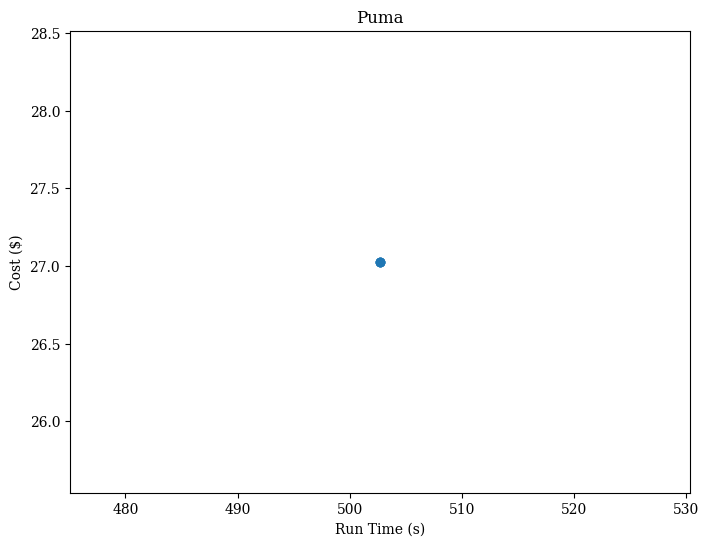

In [4]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [5]:
for i in range(len(res.history)):
    s_opt = res.history[i].opt.get('F').shape
    s_pop = res.history[i].pop.get('F').shape
    
    if s_opt[1] != s_pop[1]:
        print(f"Rewriting {i}: {s_opt} -> {s_pop}")

In [6]:
import os
from task_offloading_moo.utils.utils import save_generations_video_pymoo

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
save_generations_video_pymoo(res.history, out_path, "puma_video")
